<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Conv1D, MaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Use plot styling from seaborn.
  sns.set(style="darkgrid")
  # Increase the plot size and font size.
  sns.set(font_scale=1.5)
  plt.rcParams["figure.figsize"] = (12, 6)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 40s 33ms/step - loss: 0.6217 - accuracy: 0.6135 - val_loss: 0.3103 - val_accuracy: 0.8748
Epoch 2/100
176/176 [==============================] - 4s 25ms/step - loss: 0.2695 - accuracy: 0.8961 - val_loss: 0.2806 - val_accuracy: 0.8884
Epoch 3/100
176/176 [==============================] - 4s 26ms/step - loss: 0.2008 - accuracy: 0.9262 - val_loss: 0.2866 - val_accuracy: 0.8912
Epoch 4/100
176/176 [==============================] - 4s 25ms/step - loss: 0.1733 - accuracy: 0.9376 - val_loss: 0.2889 - val_accuracy: 0.8844
Epoch 5/100
176/176 [==============================] - 4s 25ms/step - loss: 0.1446 - accuracy: 0.9501 - val_loss: 0.3148 - val_accuracy: 0.8776
Epoch 6/100
176/176 [==============================] - 4s 25ms/step - loss: 0.1094 - accuracy: 0.9643 - val_loss: 0.3206 - val_accuracy: 0.8728
Epoch 7/100
176/176 [==============================] - 5s 26ms/step - loss: 0.0897 - accuracy: 0.9735 - val_loss: 0.35

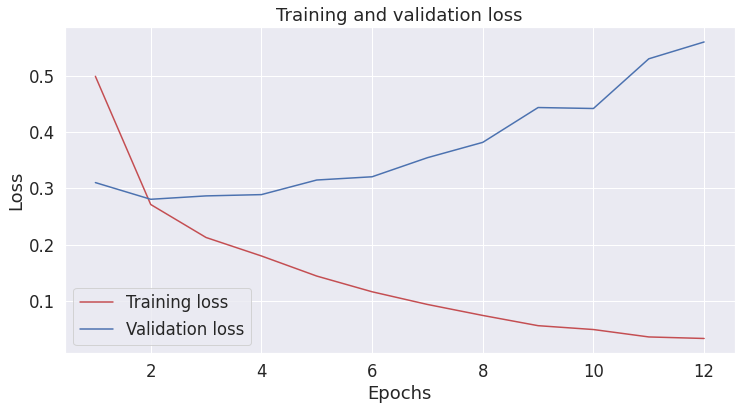

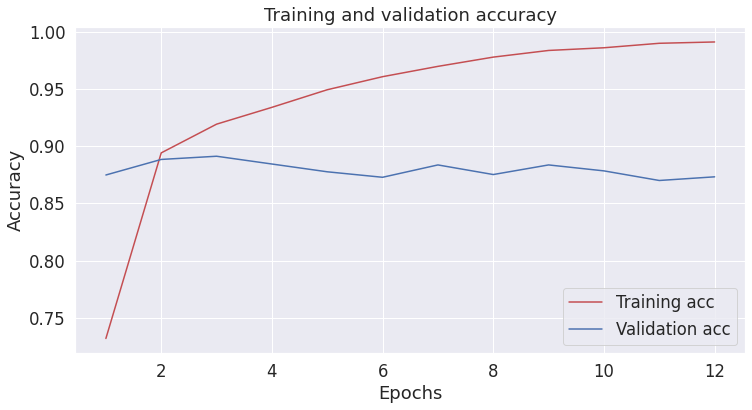

              precision    recall  f1-score   support

           0      0.900     0.854     0.876     12500
           1      0.861     0.905     0.882     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 7s 29ms/step - loss: 0.6086 - accuracy: 0.6291 - val_loss: 0.3105 - val_accuracy: 0.8692
Epoch 2/100
176/176 [==============================] - 5s 26ms/step - loss: 0.2510 - accuracy: 0.9016 - val_loss: 0.2789 - val_accuracy: 0.8880
Epoch 3/100
176/176 [==============================] - 5s 26ms/step - loss: 0.1993 - accuracy: 0.9265 - val_loss: 0.2867 - val_accuracy: 0.8816
Epoch 4/100
176/176 [==============================] - 5s 26ms/step - loss: 0.1631 - accuracy: 0.9421 - val_loss: 0.2999 - val_accuracy: 0.8820
Epoch 5/100
176/176 [==============================] - 5s 26ms/step - loss: 0.1

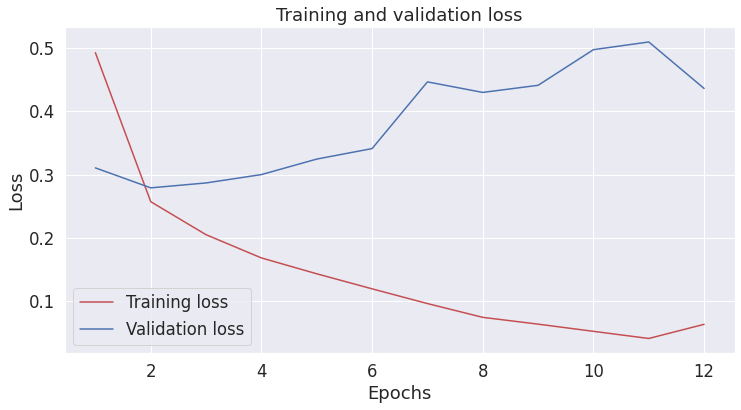

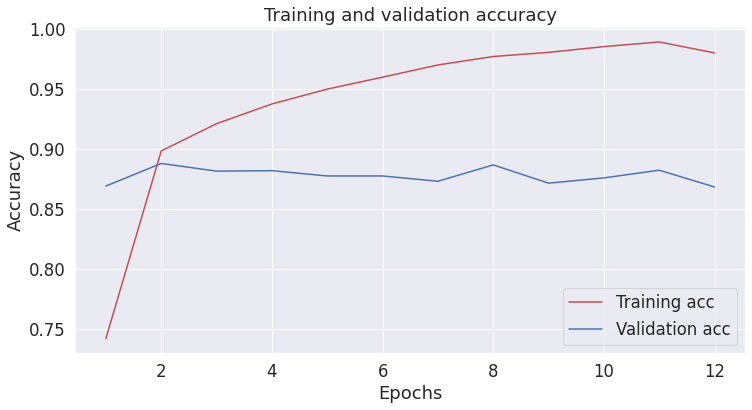

              precision    recall  f1-score   support

           0      0.876     0.892     0.884     12500
           1      0.890     0.874     0.882     12500

    accuracy                          0.883     25000
   macro avg      0.883     0.883     0.883     25000
weighted avg      0.883     0.883     0.883     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 7s 30ms/step - loss: 0.6421 - accuracy: 0.5843 - val_loss: 0.3449 - val_accuracy: 0.8540
Epoch 2/100
176/176 [==============================] - 5s 27ms/step - loss: 0.2558 - accuracy: 0.8998 - val_loss: 0.2702 - val_accuracy: 0.8912
Epoch 3/100
176/176 [==============================] - 5s 27ms/step - loss: 0.2027 - accuracy: 0.9250 - val_loss: 0.2806 - val_accuracy: 0.8832
Epoch 4/100
176/176 [==============================] - 5s 27ms/step - loss: 0.1722 - accuracy: 0.9398 - val_loss: 0.3330 - val_accuracy: 0.8844
Epoch 5/100
176/176 [==============================] - 5s 27ms/step - loss: 0.1

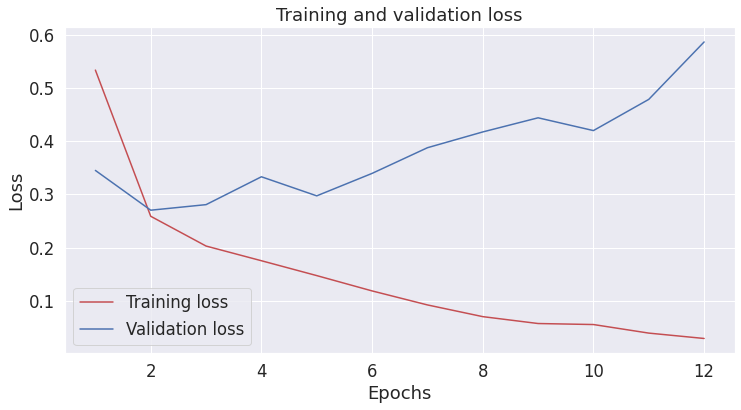

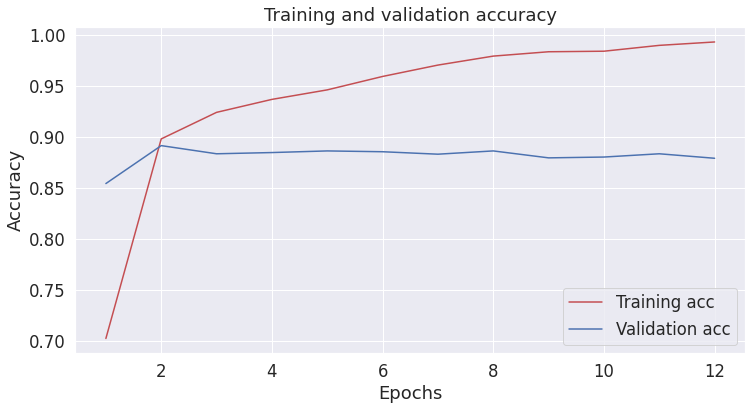

              precision    recall  f1-score   support

           0      0.896     0.876     0.886     12500
           1      0.879     0.898     0.888     12500

    accuracy                          0.887     25000
   macro avg      0.887     0.887     0.887     25000
weighted avg      0.887     0.887     0.887     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 7s 30ms/step - loss: 0.6532 - accuracy: 0.5693 - val_loss: 0.3249 - val_accuracy: 0.8660
Epoch 2/100
176/176 [==============================] - 5s 27ms/step - loss: 0.2609 - accuracy: 0.8948 - val_loss: 0.3761 - val_accuracy: 0.8716
Epoch 3/100
176/176 [==============================] - 5s 27ms/step - loss: 0.2128 - accuracy: 0.9202 - val_loss: 0.3030 - val_accuracy: 0.8784
Epoch 4/100
176/176 [==============================] - 5s 27ms/step - loss: 0.1597 - accuracy: 0.9424 - val_loss: 0.3318 - val_accuracy: 0.8740
Epoch 5/100
176/176 [==============================] - 5s 27ms/step - loss: 0.1

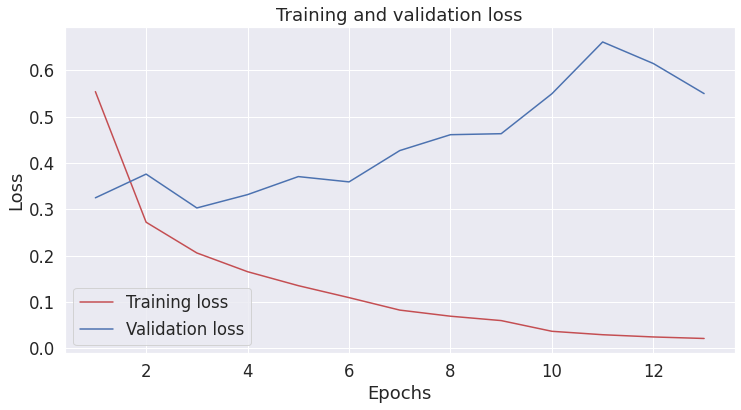

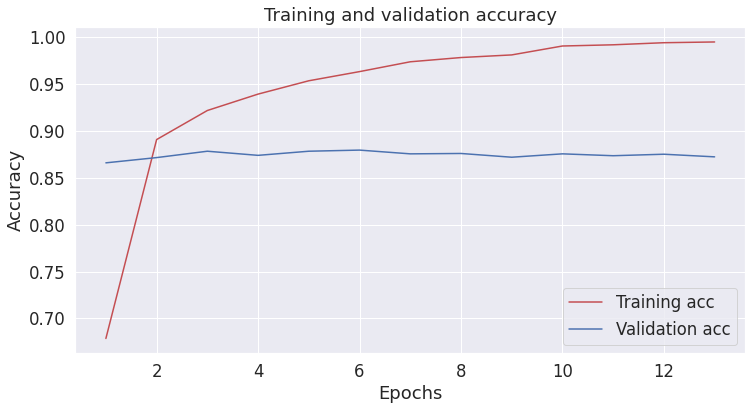

              precision    recall  f1-score   support

           0      0.898     0.865     0.881     12500
           1      0.869     0.902     0.885     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 7s 30ms/step - loss: 0.6413 - accuracy: 0.5926 - val_loss: 0.3336 - val_accuracy: 0.8516
Epoch 2/100
176/176 [==============================] - 5s 27ms/step - loss: 0.2812 - accuracy: 0.8884 - val_loss: 0.2830 - val_accuracy: 0.8752
Epoch 3/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2070 - accuracy: 0.9252 - val_loss: 0.3230 - val_accuracy: 0.8656
Epoch 4/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1652 - accuracy: 0.9416 - val_loss: 0.3050 - val_accuracy: 0.8708
Epoch 5/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1

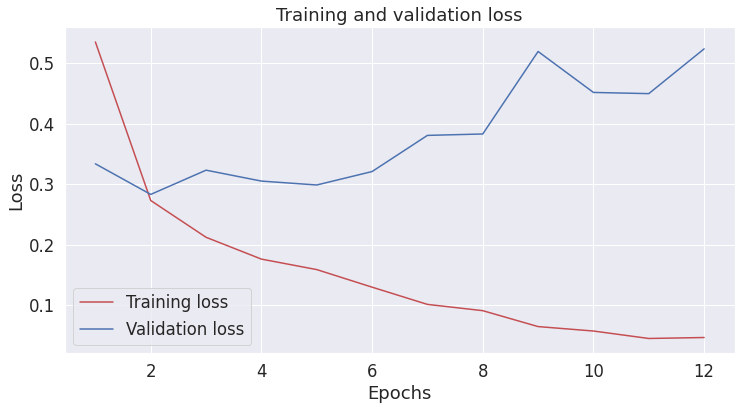

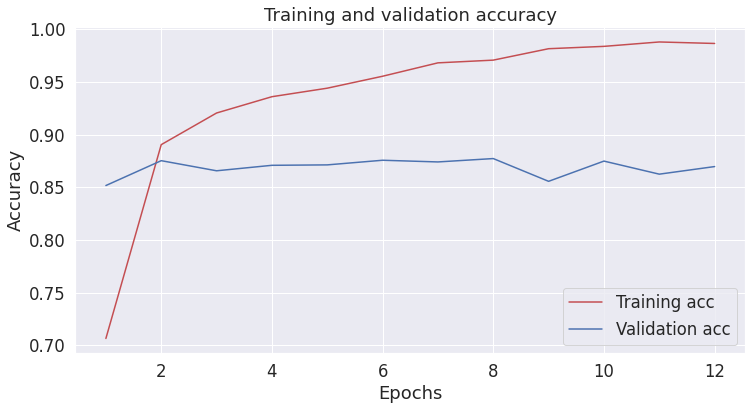

              precision    recall  f1-score   support

           0      0.887     0.875     0.881     12500
           1      0.877     0.889     0.883     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 7s 33ms/step - loss: 0.6228 - accuracy: 0.6248 - val_loss: 0.3881 - val_accuracy: 0.8244
Epoch 2/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2774 - accuracy: 0.8919 - val_loss: 0.2913 - val_accuracy: 0.8720
Epoch 3/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2150 - accuracy: 0.9171 - val_loss: 0.2957 - val_accuracy: 0.8784
Epoch 4/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1691 - accuracy: 0.9394 - val_loss: 0.3034 - val_accuracy: 0.8752
Epoch 5/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1

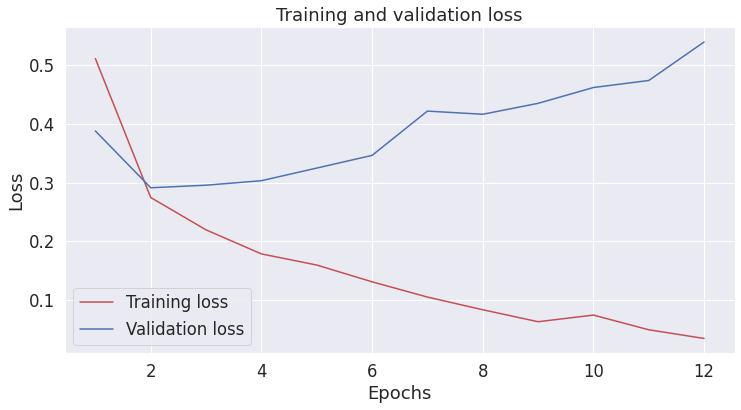

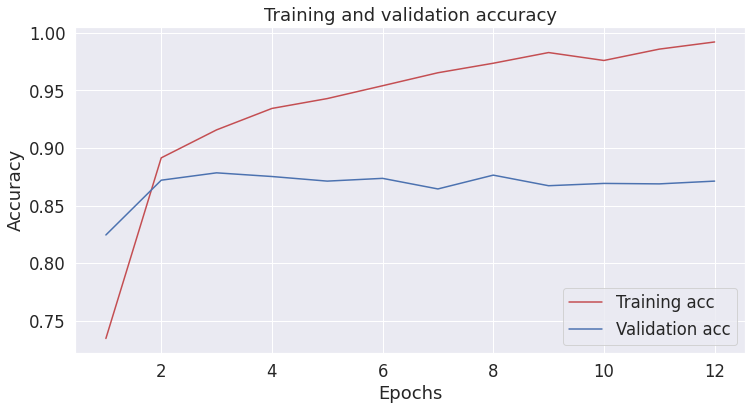

              precision    recall  f1-score   support

           0      0.881     0.878     0.879     12500
           1      0.878     0.881     0.880     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 7s 31ms/step - loss: 0.6418 - accuracy: 0.5938 - val_loss: 0.3114 - val_accuracy: 0.8732
Epoch 2/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2719 - accuracy: 0.8914 - val_loss: 0.2767 - val_accuracy: 0.8948
Epoch 3/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1861 - accuracy: 0.9315 - val_loss: 0.2721 - val_accuracy: 0.8948
Epoch 4/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1584 - accuracy: 0.9441 - val_loss: 0.3003 - val_accuracy: 0.8940
Epoch 5/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1

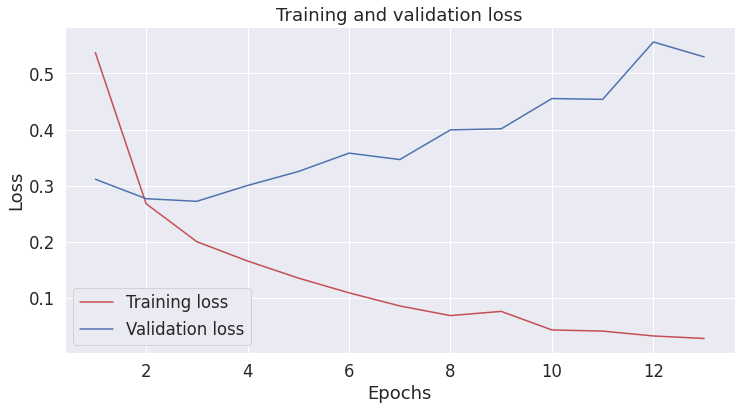

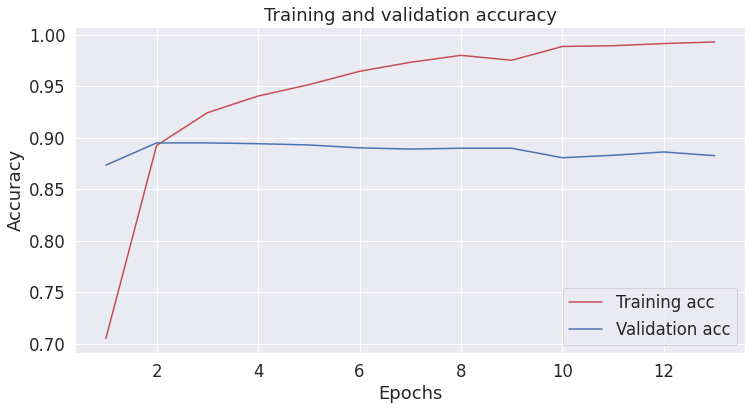

              precision    recall  f1-score   support

           0      0.906     0.855     0.880     12500
           1      0.863     0.912     0.887     12500

    accuracy                          0.883     25000
   macro avg      0.885     0.883     0.883     25000
weighted avg      0.885     0.883     0.883     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 7s 31ms/step - loss: 0.6140 - accuracy: 0.6173 - val_loss: 0.3084 - val_accuracy: 0.8752
Epoch 2/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2743 - accuracy: 0.8937 - val_loss: 0.2699 - val_accuracy: 0.8892
Epoch 3/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2063 - accuracy: 0.9219 - val_loss: 0.2809 - val_accuracy: 0.8920
Epoch 4/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1693 - accuracy: 0.9388 - val_loss: 0.2788 - val_accuracy: 0.8844
Epoch 5/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1

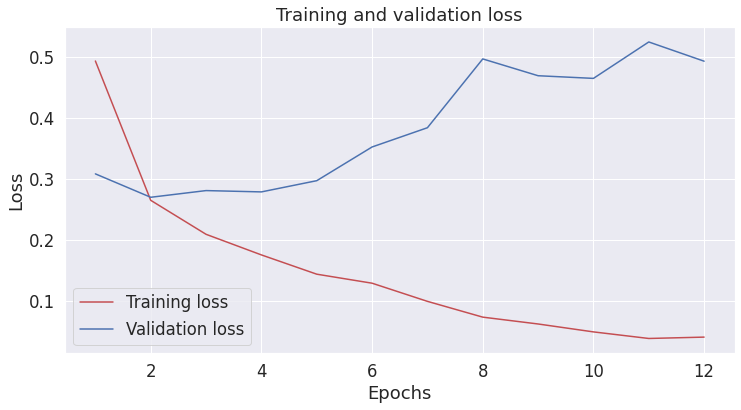

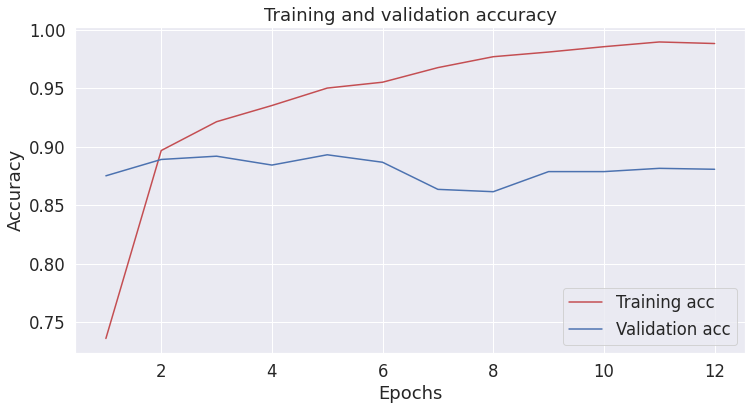

              precision    recall  f1-score   support

           0      0.881     0.891     0.886     12500
           1      0.890     0.880     0.885     12500

    accuracy                          0.885     25000
   macro avg      0.885     0.885     0.885     25000
weighted avg      0.885     0.885     0.885     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 7s 31ms/step - loss: 0.6201 - accuracy: 0.6066 - val_loss: 0.3363 - val_accuracy: 0.8600
Epoch 2/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2673 - accuracy: 0.8909 - val_loss: 0.2868 - val_accuracy: 0.8852
Epoch 3/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2090 - accuracy: 0.9234 - val_loss: 0.3260 - val_accuracy: 0.8584
Epoch 4/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1962 - accuracy: 0.9267 - val_loss: 0.3023 - val_accuracy: 0.8912
Epoch 5/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1

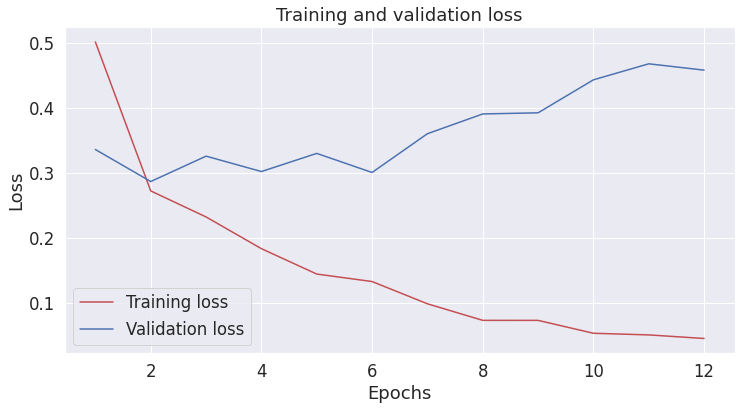

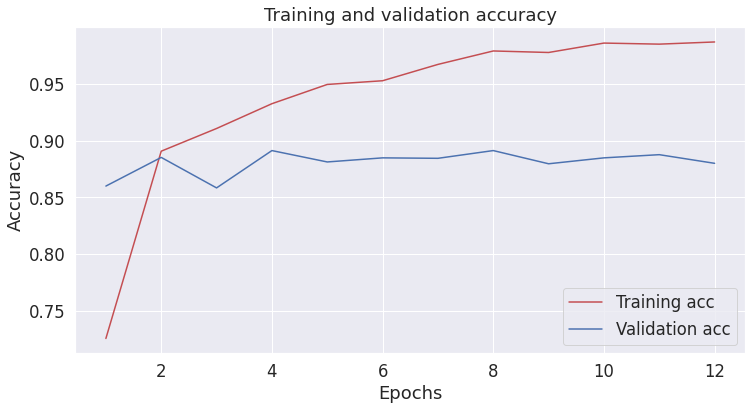

              precision    recall  f1-score   support

           0      0.870     0.888     0.879     12500
           1      0.886     0.868     0.877     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 7s 33ms/step - loss: 0.6681 - accuracy: 0.5684 - val_loss: 0.3190 - val_accuracy: 0.8652
Epoch 2/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2961 - accuracy: 0.8826 - val_loss: 0.3078 - val_accuracy: 0.8720
Epoch 3/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2503 - accuracy: 0.9030 - val_loss: 0.2652 - val_accuracy: 0.8928
Epoch 4/100
176/176 [==============================] - 5s 28ms/step - loss: 0.1811 - accuracy: 0.9337 - val_loss: 0.2863 - val_accuracy: 0.8892
Epoch 5/100
176/176 [==============================] - 5s 28ms/step - loss: 0.

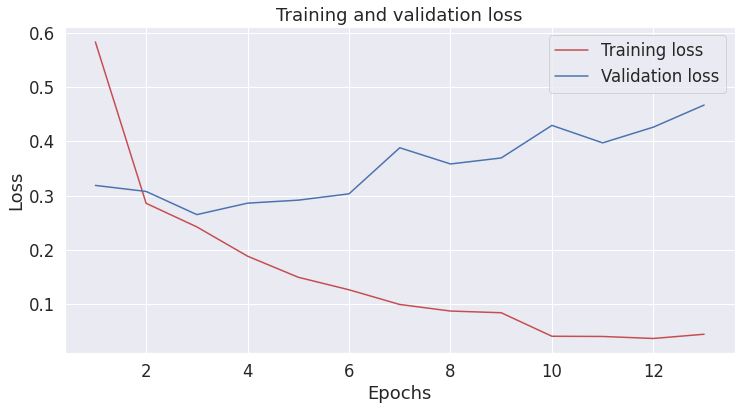

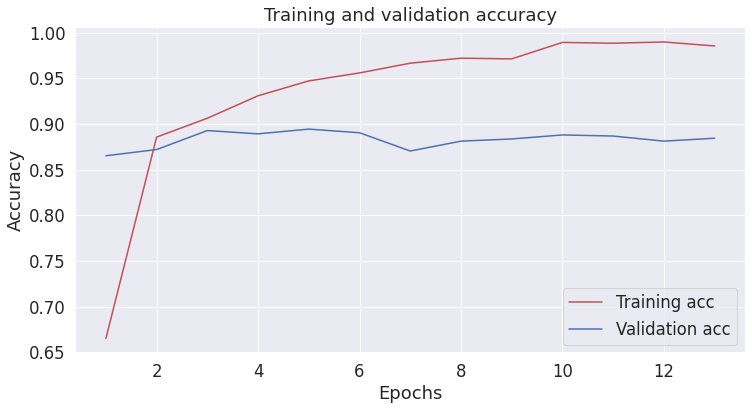

              precision    recall  f1-score   support

           0      0.884     0.884     0.884     12500
           1      0.884     0.884     0.884     12500

    accuracy                          0.884     25000
   macro avg      0.884     0.884     0.884     25000
weighted avg      0.884     0.884     0.884     25000


Average accuracy: 0.8824 (+/- 0.0027)
Average loss: 0.2863 (+/- 0.0051)
Average F1: 0.8832 (+/- 0.0032)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
